<h1>Uma Análise Sobre Acidentes Aéreos no Brasil</h1>
Realizada por <i>Samuel Almeida da Silva</i>.
<br>
<img src='./top.jpeg'>
<h2>Introdução</h2>
<br>
O avião é considerado um dos transportes mais seguros do mundo, porém é inevitável acidentes, mesmo com órgãos reguladores ocorre fatalidades como por exemplo o <a href='http://globoesporte.globo.com/sc/futebol/times/chapecoense/noticia/2016/11/imprensa-colombiana-diz-que-aviao-que-transporta-chape-esta-desaparecido.html'>avião que transportava a Associação Chapecoense de Futebol</a> ou mais recentemente com o <a href='https://g1.globo.com/se/sergipe/noticia/2019/05/27/corpo-de-bombeiros-e-acionado-para-atender-acidente-envolvendo-queda-de-bimotor.ghtml'>avião do cantor Gabriel Diniz</a>, caso que reascende discussão a respeito da segurança da aviação e a capacidade humana de influenciar no desenrolar de um acidente, motivos que me levam a produzir este conteúdo.
<br>

<h2>Dados utilizados</h2>
<br>
Nesta análise estarei utilizando dados abertos disponibilizados pela CENIPA (Centro de Investigação e Prevenção de Acidentes aeronáuticos) com última atualização em 15 de Julho de 2019, estes conterão informações sobre ocorrências envolvendo aeronaves em território brasileiro dos últimos 10 anos. Caso esteja visualizando este <i>storytelling</i> posteriormente a sua publicação, poderá obter dados atualizados acessando o <a href= 'http://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira'>Portal Brasileiro de Dados Abertos</a>, mas também possui a opção de realizar download nos links abaixo.
<br>

<a href='./Projects_Jupyter_Notebook/Analise_acidentes_aereos_BR/Dataset/oco.csv'>Ocorrências / oco.csv</a>: Possui os dados sobre cada ocorrência registrada nos últimos 10 anos.<br>
Serão encontrados nesse conjunto de dados o Código da ocorrência, Data, Motivo da Ocorrência e Localização.
<br>

<a href='./Projects_Jupyter_Notebook/Analise_acidentes_aereos_BR/Dataset/anv.csv'>Aeronaves / anv.csv</a>: Informações agrupadas sobre as aeronaves envolvidas em acidentes registrados no arquivo de ocorrências.<br>
Serão encontrados nesse conjunto de dados o Modelo da Aeronave, Tipo de Aeronave, Fabricante, Quantidade de Fatalidades, dentre outras.

<h2>Questionamentos</h2>
<br>
<li>Como tem sido a progressão desses casos nos últimos anos? Tiveram menos ocorrências ou mais?</li>
<li>Quais os estados que mais possuem ocorrências registradas?</li>
<li>Quais são as maiores causas de ocorrências e, eventualmente, queda de aviões?</li>
<li>Qual tipo de aeronave possui mais problemas? Aviões, jatos, planadores?</li>
<li>Quais as fabricantes com maior número de defeitos registrados?</li>
<li>Será que durante o pouso é mais comum ter problemas do que durante a decolagem? Ou durante a viagem em si é mais frequente surgir defeitos?</li>
<li>Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?</li>
<li>Quantos incidentes com fatalidades (morte de passageiros e tripulação) temos registro nos últimos 10 anos?</li>

<h2>Importando as bibliotecas</h2>

In [195]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<h2>Leitura do dataset</h2>

In [196]:
ocorrencia = pd.read_csv('oco.csv', sep = '~')
aeronave = pd.read_csv('anv.csv', sep = '~')

<h2>Analisando o dataset de ocorrências</h2>

Vamos realizar a análise da primeira base de dados: o dataset de ocorrências. Este arquivo possui informações acerca do local, data, causas e outros detalhes das ocorrências registradas dos últimos 10 anos.

<h2>Limpeza do dataset (Data cleaning)</h2>

In [197]:
ocorrencia.dtypes

codigo_ocorrencia                   int64
ocorrencia_classificacao           object
ocorrencia_tipo                    object
ocorrencia_tipo_categoria          object
ocorrencia_tipo_icao               object
ocorrencia_latitude               float64
ocorrencia_longitude              float64
ocorrencia_cidade                  object
ocorrencia_uf                      object
ocorrencia_pais                    object
ocorrencia_aerodromo               object
ocorrencia_dia                     object
ocorrencia_horario                 object
investigacao_aeronave_liberada     object
investigacao_status                object
divulgacao_relatorio_numero        object
divulgacao_relatorio_publicado     object
divulgacao_dia_publicacao          object
total_recomendacoes                 int64
total_aeronaves_envolvidas          int64
ocorrencia_saida_pista             object
ocorrencia_dia_extracao            object
dtype: object

In [198]:
ocorrencia.drop(['ocorrencia_aerodromo','ocorrencia_horario','investigacao_aeronave_liberada','ocorrencia_tipo_icao',
                 'divulgacao_relatorio_numero','divulgacao_relatorio_publicado','divulgacao_dia_publicacao',
                 'total_recomendacoes','total_aeronaves_envolvidas','ocorrencia_saida_pista',
                 'ocorrencia_dia_extracao'], axis=1, inplace=True)

In [199]:
ocorrencia.columns

Index(['codigo_ocorrencia', 'ocorrencia_classificacao', 'ocorrencia_tipo',
       'ocorrencia_tipo_categoria', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf',
       'ocorrencia_pais', 'ocorrencia_dia', 'investigacao_status'],
      dtype='object')

In [200]:
ocorrencia.columns = ['ID da ocorrência','Classificação','Tipo','Categoria','Latitude','Longitude','Cidade','UF','País'
                      ,'Data','Status da investigação']

ocorrencia['Contagem'] = 1

In [201]:
ocorrencia['ID da ocorrência'].dropna(axis = 0, inplace = True) #Retirar linhas onde o código da ocorrência é inválido.

In [202]:
ocorrencia.head()

,ID da ocorrência,Classificação,Tipo,Categoria,Latitude,Longitude,Cidade,UF,País,Data,Status da investigação,Contagem
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,2013-05-05,FINALIZADA,1
1,201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,-11.4956,-61.4508,CACOAL,RO,BRASIL,2013-11-25,FINALIZADA,1
2,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,-11.2644,-61.2589,CACOAL,RO,BRASIL,2016-05-13,FINALIZADA,1
3,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,-11.4956,-61.4508,CACOAL,RO,BRASIL,2018-03-09,FINALIZADA,1
4,201103187273112,INCIDENTE,OUTROS,OUTROS,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,2011-03-18,FINALIZADA,1


<h2>Visualização dos Dados (Data Visualization)</h2>

<h3>Como tem sido a progressão desses casos nos últimos anos? Tiveram menos ocorrências ou mais?</h3>

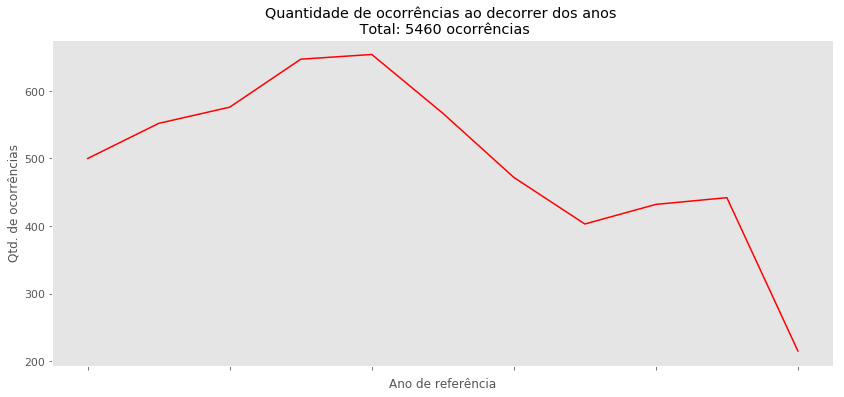

In [203]:
plotagem_data = ocorrencia.copy()
plotagem_data['Dia'] = plotagem_data['Data'].apply(lambda x: x.replace(x,x[0:4]))
plotagem_data.groupby('Dia')['Contagem'].sum().plot(color='red', figsize=(14,6), grid=False)

plt.title('Quantidade de ocorrências ao decorrer dos anos \n Total: ' + str(ocorrencia['Contagem'].sum()) + ' ocorrências')
plt.xlabel('Ano de referência')
plt.ylabel('Qtd. de ocorrências')
plt.tick_params(axis='both', labelsize=11)
plt.show()

A progressão de ocorrências aéreas cresceu assustadoramente até o ano de 2013, onde a marca chegou ao pico de 654 ocorrências, porém nos últimos anos este número vem diminuindo gradativamente, estamos a frente do primeiro semestre e foi registrada somente 215 ocorrências em 2019.

<h3>Quais os estados que mais possuem ocorrências registradas?</h3>

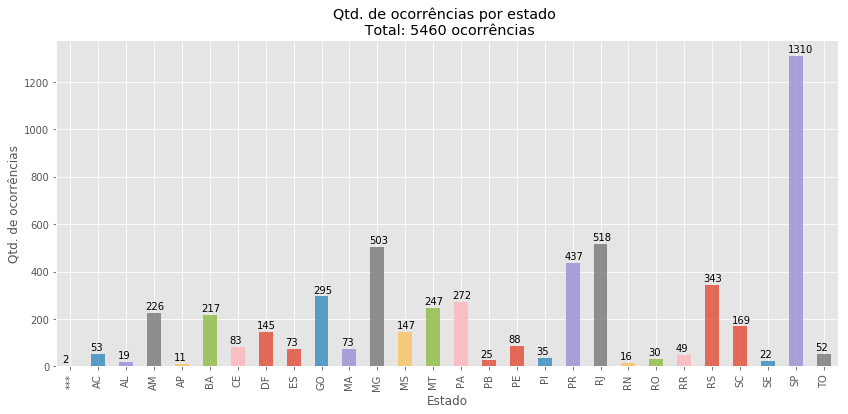

In [204]:
oc_estado = ocorrencia.groupby('UF')['Contagem'].sum().plot(kind='bar', figsize=(14,6), alpha=.8)

for p in oc_estado.patches:
    b=p.get_bbox()
    oc_estado.annotate("{:.0f}". format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.3, b.y1 + 15))

plt.title('Qtd. de ocorrências por estado \n Total: ' + str(ocorrencia['Contagem'].sum()) + ' ocorrências')
plt.xlabel('Estado')
plt.ylabel('Qtd. de ocorrências')
plt.show()

O estado de São Paulo obteve o maior número de ocorrências registradas entre 2009 e 2019, este número que preocupa é maior do que os encontrados em todos os outros estados da região Sudeste juntos! Cogita-se que este número é acima da média pelo fato deste possuir a maior quantidade de aeroportos e o maior volume de voos no Brasil, este dado pode ser facilmente consultado utilizando o flight radar ou através <a href='https://pt.wikipedia.org/wiki/Lista_de_aeroportos_do_Brasil_por_movimento'>deste link</a> que mostra os aeroportos mais movimentados do país.

O estado com três asteriscos representa ocorrências registradas que não tiveram sua localização identificadas, como por exemplo "Águas Internacionais".

<h3>Quais são as maiores causas de ocorrências e, eventualmente, queda de aviões?</h3>

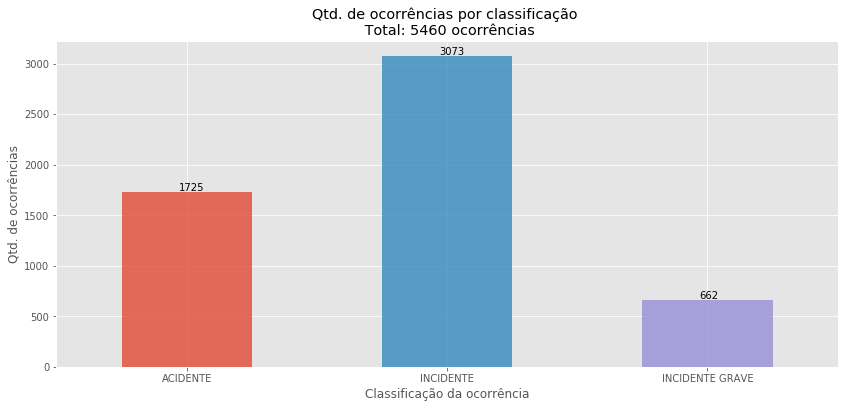

In [205]:
classificacao = ocorrencia.groupby('Classificação')['Contagem'].sum().plot(kind='bar', figsize=(14,6), alpha=.8)

for p in classificacao.patches:
    b=p.get_bbox()
    classificacao.annotate("{:.0f}". format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))

plt.title('Qtd. de ocorrências por classificação \n Total: ' + str(ocorrencia['Contagem'].sum()) + ' ocorrências')
plt.xlabel('Classificação da ocorrência')
plt.ylabel('Qtd. de ocorrências')
plt.xticks(rotation=0)
plt.show()

Como podemos ver no gráfico, as ocorrências são divididas em três principais classificações: Acidente, Indidente e Incidente Grave. Vale lembrar que, embora este arquivo trate de ocorrências envolvendo aeronaves nos últimos 10 anos, não significa que todas as ocorrências foram graves ou que houveram fatalidades. Muitos dos casos são sim, de quedas de avião decorrente de alguma falha humana ou mecânica, mas você verá mais a frente que nem todos são assim.

Text(0, 0.5, 'Tipo de ocorrências')

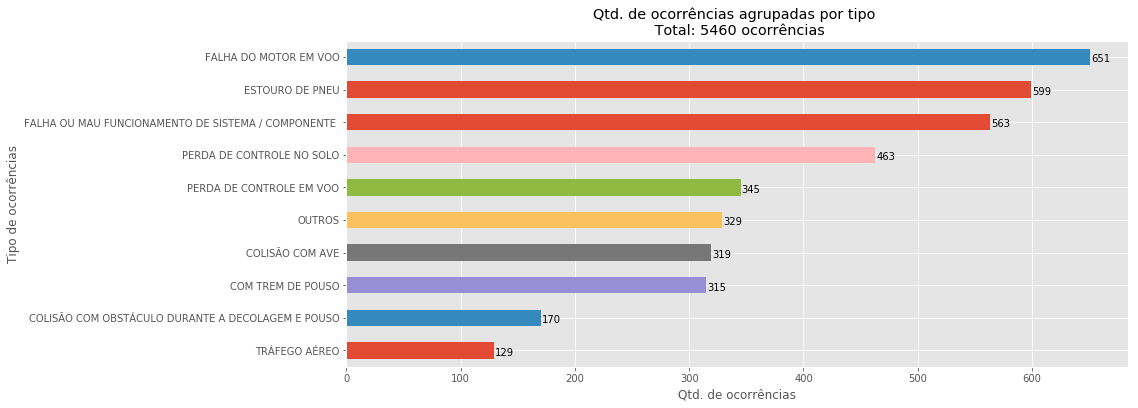

In [206]:
tipos = ocorrencia.groupby('Tipo')['Contagem'].sum().sort_values(ascending=False)
tipo = tipos.head(10).sort_values(ascending=True).plot(kind='barh', figsize=(14,6))

for p in tipo.patches:
    b=p.get_bbox()
    tipo.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() + 0.1))
    
plt.title('Qtd. de ocorrências agrupadas por tipo \n Total: ' + str(ocorrencia['Contagem'].sum()) + ' ocorrências')
plt.xlabel('Qtd. de ocorrências')
plt.ylabel('Tipo de ocorrências')

De acordo com os dados deste <i>plot</i>, as maiores causas de ocorrências são devidas a motivos mecânicos(3 primeiros itens), seguidas por perda de controle no solo e perda de controle em voo. Embora tais causas nos remetam a falha humana na operação, não podemos levar isto como uma regra, pois uma perda de controle em vôo pode dever-se desde incompetência técnica até falha em dispositivos como o radar. Todavia, a escala dos oito principais motivos é uma causa a se preocupar, pois ultrapassam 300 ocorrências individualmente.

<h2>Analisando o dataset de aeronaves</h2>

Agora vamos partir para o segundo conjunto de dados deste estudo: o dataset de aeronaves. Este arquivo possui informações acerca dos veículos que estavam envolvidos nas ocorrências registradas dos últimos anos.

<h2>Limpeza do dataset (Data cleaning)</h2>

In [207]:
aeronave.dtypes

codigo_ocorrencia                int64
aeronave_matricula              object
aeronave_operador_categoria     object
aeronave_tipo_veiculo           object
aeronave_fabricante             object
aeronave_modelo                 object
aeronave_tipo_icao              object
aeronave_motor_tipo             object
aeronave_motor_quantidade       object
aeronave_pmd                     int64
aeronave_pmd_categoria          object
aeronave_assentos              float64
aeronave_ano_fabricacao        float64
aeronave_pais_fabricante        object
aeronave_pais_registro          object
aeronave_registro_categoria     object
aeronave_registro_segmento      object
aeronave_voo_origem             object
aeronave_voo_destino            object
aeronave_fase_operacao          object
aeronave_fase_operacao_icao     object
aeronave_tipo_operacao          object
aeronave_nivel_dano             object
total_fatalidades                int64
aeronave_dia_extracao           object
dtype: object

In [208]:
aeronave.drop(['aeronave_matricula','aeronave_operador_categoria','aeronave_tipo_icao','aeronave_pmd','aeronave_pmd_categoria',
               'aeronave_assentos','aeronave_pais_fabricante','aeronave_registro_categoria','aeronave_voo_origem',
               'aeronave_voo_destino','aeronave_fase_operacao_icao','aeronave_dia_extracao'], axis = 1, inplace = True)

In [209]:
aeronave.columns

Index(['codigo_ocorrencia', 'aeronave_tipo_veiculo', 'aeronave_fabricante',
       'aeronave_modelo', 'aeronave_motor_tipo', 'aeronave_motor_quantidade',
       'aeronave_ano_fabricacao', 'aeronave_pais_registro',
       'aeronave_registro_segmento', 'aeronave_fase_operacao',
       'aeronave_tipo_operacao', 'aeronave_nivel_dano', 'total_fatalidades'],
      dtype='object')

In [210]:
def convert_na(dataframe, column):
    for i in column:
        dataframe[i].fillna(0, inplace = True)

convert_na(aeronave,['total_fatalidades','aeronave_motor_quantidade','aeronave_ano_fabricacao'])

In [211]:
def convert_dtype(dataframe, column, dtype):
    for i in column:
        dataframe[i] = dataframe[i].astype(dtype)

convert_dtype(aeronave,['aeronave_ano_fabricacao'],int)

In [212]:
aeronave.dtypes

codigo_ocorrencia              int64
aeronave_tipo_veiculo         object
aeronave_fabricante           object
aeronave_modelo               object
aeronave_motor_tipo           object
aeronave_motor_quantidade     object
aeronave_ano_fabricacao        int32
aeronave_pais_registro        object
aeronave_registro_segmento    object
aeronave_fase_operacao        object
aeronave_tipo_operacao        object
aeronave_nivel_dano           object
total_fatalidades              int64
dtype: object

In [213]:
aeronave.columns = ['ID ocorrência','Tipo de veículo','Fabricante','Modelo','Tipo de motor','Quantidade motor',
                  'Ano de fabricação','País registro','Segmento do avião','Fase de operação','Tipo de operação',
                  'Nível de dano','Total fatalidades']
aeronave = aeronave.apply(lambda x: x.replace('***','NÃO IDENTIFICADO'))
aeronave['Contagem'] = 1

In [214]:
aeronave.head()

,ID ocorrência,Tipo de veículo,Fabricante,Modelo,Tipo de motor,Quantidade motor,Ano de fabricação,País registro,Segmento do avião,Fase de operação,Tipo de operação,Nível de dano,Total fatalidades,Contagem
0,201106142171203,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,MONOMOTOR,1962,BRASIL,INSTRUÇÃO,INDETERMINADA,VOO DE INSTRUÇÃO,SUBSTANCIAL,0,1
1,201205209591320,AVIÃO,EMBRAER,EMB-810C,PISTÃO,BIMOTOR,1980,BRASIL,TÁXI AÉREO,APROXIMAÇÃO FINAL,TÁXI AÉREO,NENHUM,0,1
2,201012015549851,AVIÃO,TWIN COMMANDER,500-B,PISTÃO,BIMOTOR,1961,BRASIL,TÁXI AÉREO,CORRIDA APÓS POUSO,TÁXI AÉREO,LEVE,0,1
3,201708190325167,AVIÃO,TWIN COMMANDER,500-B,PISTÃO,BIMOTOR,1961,BRASIL,ESPECIALIZADA,CRUZEIRO,OPERAÇÃO ESPECIALIZADA,LEVE,0,1
4,201803182255192,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,MONOMOTOR,1960,BRASIL,INSTRUÇÃO,ARREMETIDA NO SOLO,VOO DE INSTRUÇÃO,LEVE,0,1


<h2>Visualização dos Dados (Data Visualization)</h2>

<h3>Qual tipo de motor mais gerou ocorrências nos últimos 10 anos?</h3>

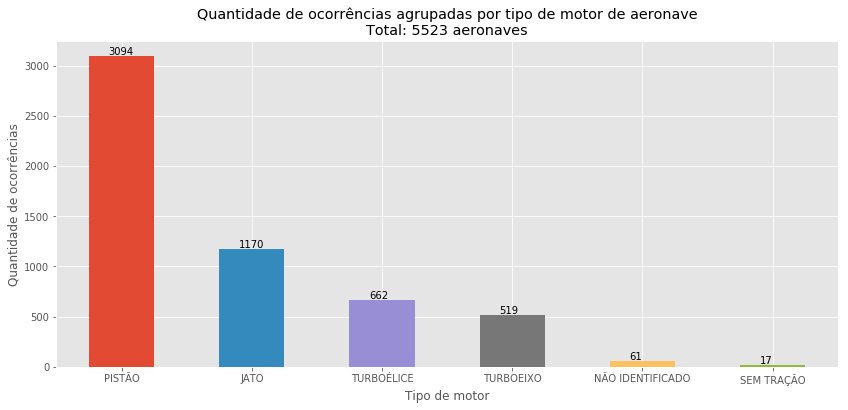

In [215]:
motor = aeronave.groupby('Tipo de motor')['Contagem'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(14,6))

for p in motor.patches:
    b=p.get_bbox()
    motor.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.title('Quantidade de ocorrências agrupadas por tipo de motor de aeronave\nTotal: '+str(aeronave['Contagem'].sum())+' aeronaves')
plt.ylabel('Quantidade de ocorrências')
plt.xticks(rotation=0)
plt.show()

Os motores a pistão lideram com as maiores quantidades de ocorrências geradas. Esse motor é um dos mais antigos de aeronave no mundo, muito comum em aviões monomotores. Além do baixo custo, eles são semelhantes aos motores de carro, mas tratados com os padrões de qualidade e confiança da aeronáutica, funcionando muito bem em baixas altitudes.
Em breve vamos verificar se esta informação possui correlação com as fabricantes de aeronaves.

<h3>Será que ocorrências envolvendo aviões aparecem em menor frequência do que para helicópteros e outras aeronaves? </h3>

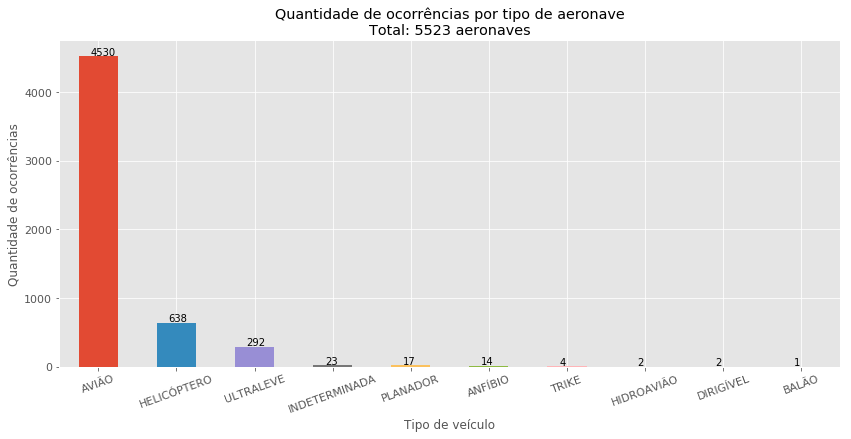

In [216]:
tipoveiculo = aeronave.groupby('Tipo de veículo')['Contagem'].sum().sort_values(ascending = False).plot(kind='bar', figsize=(14,6))

for p in tipoveiculo.patches:
    b=p.get_bbox()
    tipoveiculo.annotate('{:.0f}'.format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 15))
    
plt.title('Quantidade de ocorrências por tipo de aeronave\nTotal: ' + str(aeronave['Contagem'].sum()) + ' aeronaves')
plt.ylabel('Quantidade de ocorrências')
plt.tick_params(labelsize = 11)
plt.xticks(rotation = 20)
plt.show()

Definitivamente, ocorrências envolvendo aviões surgem com muito mais frequência do que para helicópteros. Na verdade, a quantidade total de ocorrências de aviões é maior do que a soma de todos os outros tipos de aeronave. Até mesmo dirigíveis e balão aparecem neste <i>dataset</i>!

<h3>Quais são as fabricantes que mais aparecem nos problemas relatados?</h3>

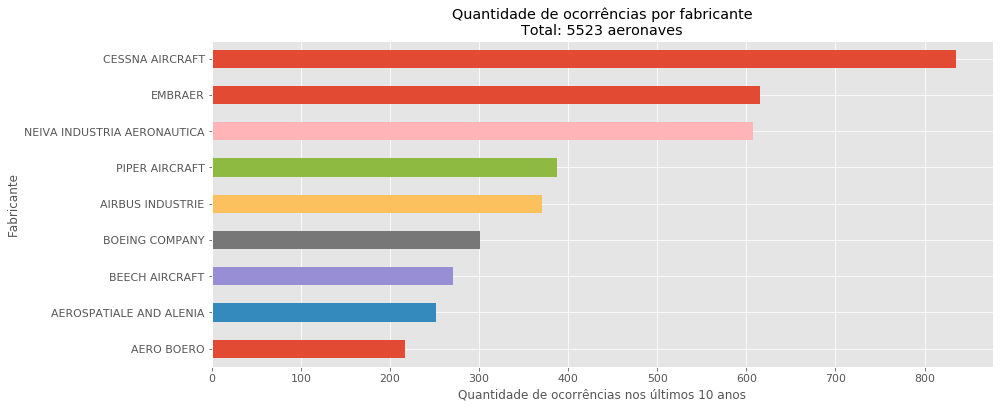

In [217]:
fabricante = aeronave.groupby('Fabricante')['Contagem'].sum().sort_values(ascending=False)
fabricante_plotagem = fabricante.head(9).sort_values(ascending=True).plot(kind='barh', figsize=(14,6))

plt.title('Quantidade de ocorrências por fabricante\nTotal: ' + str(aeronave['Contagem'].sum()) + ' aeronaves')
plt.xlabel('Quantidade de ocorrências nos últimos 10 anos')
plt.tick_params(labelsize = 11)
plt.show()

A fabricante Cessna Aircraft ocupa 15% das causas de ocorrências envolvendo aeronaves, produzindo principalmente, aviões de motores a pistão voltados para agricultura. Esta informação possui correlação com o registro do Tipo de motor verificado anteriormente, pois a empresa que fabrica aeronaves com maior número de registros, também realiza a maior produção do motor a pistão, qual é o tipo de motor com maior número de registros.

A quantidade de ocorrências para as três fabricantes que lideram o <i>plot</i> acima, mostram uma diferença gritante em relação as outras. A Neiva Industria Aeronautica que possui 607 ocorrências, por exemplo, possui a diferença de 56% em relação ao quarto lugar: a Piper Aircraft, que possui 388 incidentes. Tais indicadores seriam uma boa forma de reavaliar o processo de montagem, manutenção e qualidade de peças dessas fabricantes.

<h3>Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?</h3>

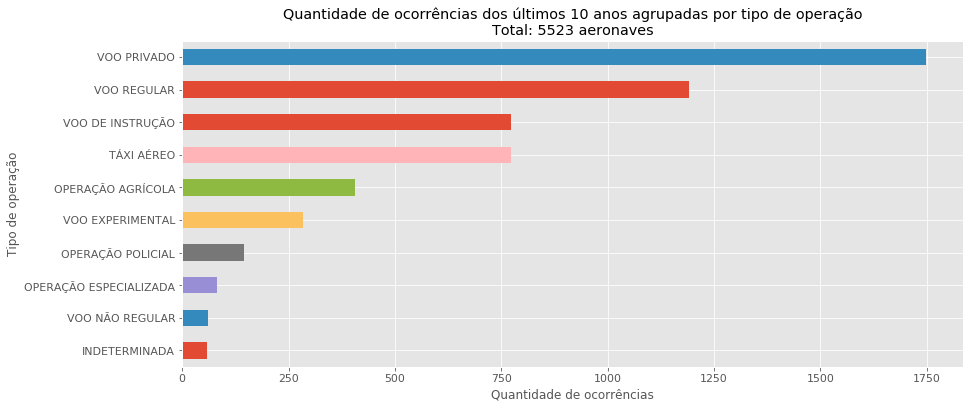

In [218]:
tipooperacao = aeronave.groupby('Tipo de operação')['Contagem'].sum().sort_values().plot(kind='barh', figsize=(14,6))

plt.title('Quantidade de ocorrências dos últimos 10 anos agrupadas por tipo de operação\nTotal: ' + str(aeronave['Contagem'].sum()) + ' aeronaves')
plt.xlabel('Quantidade de ocorrências')
plt.tick_params(labelsize = 11)
plt.show()

Muitas pessoas tem medo de voar. Isso é fato, contudo, o gráfico acima mostra-se que esse medo pode ser diminuído. A maioria de ocorrências registradas são atribuídas a aeronaves particulares - próximo a 500 ocorrências acima do tipo de operação subsequente - onde o voo é privado, estes podem ser desde monomotores e ultraleves até aviões particulares. Tais dados explicam o porquê da Cessna Aircraft ser uma das fabricantes que mais possuem ocorrência, já que a grande fatia desta escala é atribuida aos principais tipos de avião que ela produz.

Voo regular é o popularmente dito voo comercial, cuja função é transportar passageiros pagantes, geralmente operada por uma linha aérea.

<h3>Será que durante o pouso é mais comum ter problemas do que durante a decolagem? Ou durante a viagem em si é mais frequente surgir defeitos?</h3>

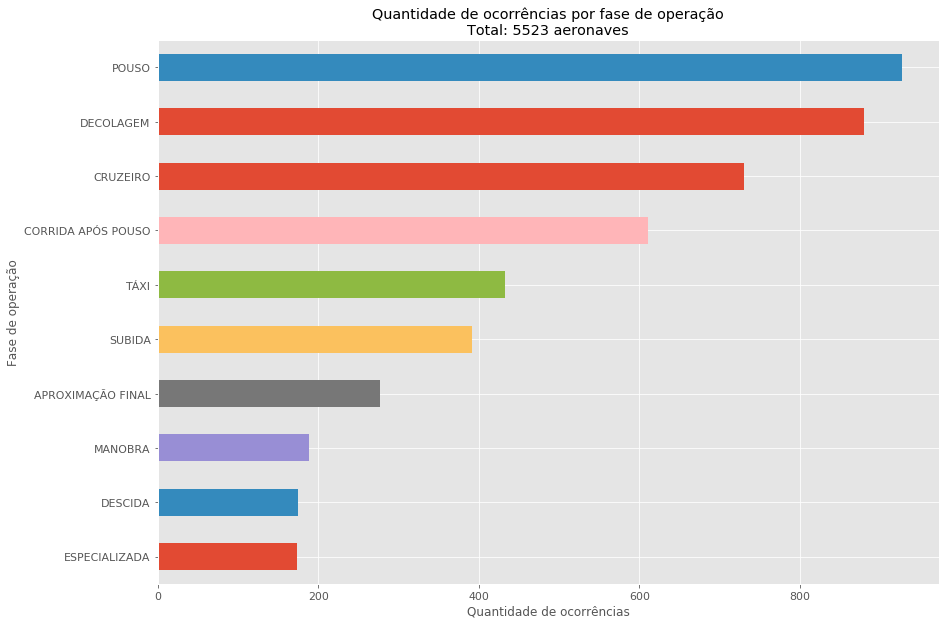

In [219]:
fasedeoperacao = aeronave.groupby('Fase de operação')['Contagem'].sum().sort_values(ascending=False)
fasedeoperacao_plotagem = fasedeoperacao.head(10).sort_values(ascending=True).plot(kind='barh', figsize=(14,10))

plt.title('Quantidade de ocorrências por fase de operação\nTotal: ' + str(aeronave['Contagem'].sum()) + ' aeronaves')
plt.xlabel('Quantidade de ocorrências')
plt.tick_params(labelsize=11)
plt.show()

De fato, o momento do pouso é um dos mais importantes da viagem. Cerca de 950 ocorrências, das mais de 5000 registradas ocorreram nesta fase. Contudo, vale ressaltar que a decolagem está consideravelmente próxima ao pouso, cerca de 900, fazendo dela uma operação delicada também. Já a fase de cruzeiro, que se encontra em terceira posição, é o momento da viagem em si, quando o avião está trafegando da origem ao destino.

<h3>Quais são os tipos de danos que podem ocorrer a uma aeronave?</h3>

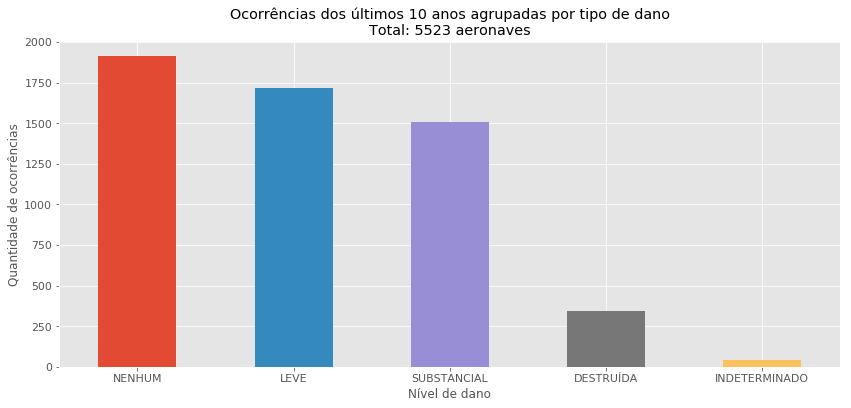

In [220]:
niveldano = aeronave.groupby('Nível de dano')['Contagem'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(14,6))

plt.title('Ocorrências dos últimos 10 anos agrupadas por tipo de dano\nTotal: ' + str(aeronave['Contagem'].sum()) + ' aeronaves')
plt.ylabel('Quantidade de ocorrências')
plt.xticks(rotation=0)
plt.tick_params(labelsize=11)
plt.show()

Embora o volume de ocorrências seja relevante, de forma curiosa, identificamos neste <i>plot</i> que na maioria dos casos não ocorre nenhum dano a aeronave, seguido por danos leves onde a aeronave possui danos, porém consegue manter-se em ativa sem a necessidade de reparos prévios.

Já os danos substanciais são aqueles que danificaram significativamente a aeronave, neste a fuselagem foi danificada, uma asa, turbina, hélice, dentre outros. A barra onde ocorre destruído fala por sí, não é possível realizar conserto para voltar a ativa.

<h3>Quantos incidentes com fatalidades (morte de passageiros e tripulação) temos registro nos últimos 10 anos?</h3>

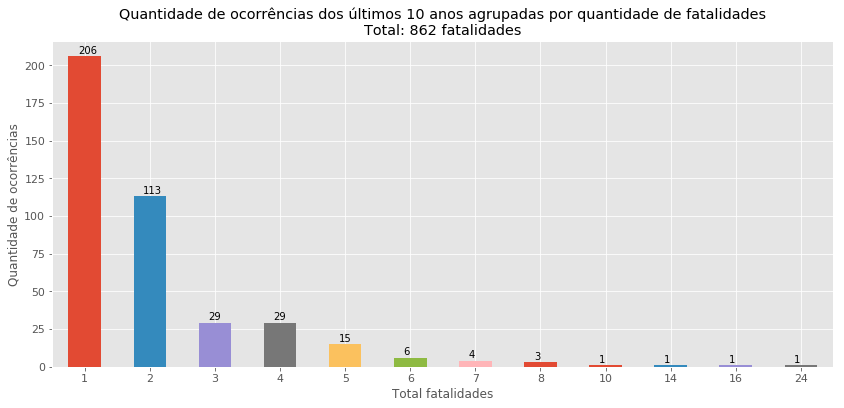

In [221]:
fatalidades_maior_zero = aeronave[aeronave[('Total fatalidades')] > 0]
fatalidades = fatalidades_maior_zero.groupby('Total fatalidades')['Contagem'].sum().plot(kind='bar', figsize=(14,6))

for p in fatalidades.patches:
    b=p.get_bbox()
    fatalidades.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.1, b.y1 + 2))
    
plt.title('Quantidade de ocorrências dos últimos 10 anos agrupadas por quantidade de fatalidades\nTotal: ' + str(aeronave['Total fatalidades'].sum()) + ' fatalidades')
plt.ylabel('Quantidade de ocorrências')
plt.xticks(rotation=0)
plt.tick_params(labelsize=11)
plt.show()

Para este gráfico, os casos onde não houveram fatalidades foram ignorados, felizmente são a grande maioria. Os dados restantes mostram que a maior frequência de mortes é atribuída a apenas uma pessoa, lembrando que a maioria das ocorrências registradas são de aviões a pistão, aeronaves estas presentes na linha de produção da fabricante com mais ocorrências: a Cessna Aircraft. Aeronaves monomotores e ultraleves possuem uma quantidade de assentos bem limitada, cerca de um ou dois. Tais quantidades são justamente encontradas nas duas primeiras posições do gráfico.

Me chama a atenção que nos últimos anos não possuímos nenhuma ocorrência com um grande número de fatalidades, como por exemplo, o desastre envolvendo um Airbus A-320 no ano de 2007 em São Paulo, quando este tentou, sem sucesso, pousar na pista principal do aeroporto de Congonhas. Sob chuva, a aeronave ultrapassou os limites do aeroporto, atravessou a avenida Washington Luiz - chegando a tocar em um táxi durante o trajeto - e acabou se chocando contra um prédio da TAM Express. Você pode conferir maiores informações sobre esse trágico acidente que matou 199 pessoas <a href='https://noticias.uol.com.br/ultnot/especial/acidentecongonhas/ultnot/2007/07/27/ult5258u401.jhtm'>clicando aqui</a>.

Ou então quando um boeing da Gol chocou-se contra um jato Legacy que se dirigia para os Estados Unidos no dia 29 de Setembro de 2006. Com a queda, a aeronave caiu em uma mata fechada no Mato Grosso do Sul, matando 154 pessoas a bordo, incluindo passageiros e tripulação. <a href='http://g1.globo.com/mato-grosso/noticia/2016/09/acidente-com-aviao-da-gol-que-matou-154-pessoas-completa-10-anos.html'>Confira maiores detalhes clicando aqui</a>.

<h1>Conclusão</h1> <br>
Observando as informações, concluímos que o número de ocorrências e fatalidades vem decaindo nos últimos anos, também obervando que não possuímos nenhuma ocorrências com número gritante de fatalidades nos últimos tempos, como os exemplos mencionados anteriormente. De fato aviões não são indestrutíveis ou absolutamente seguros, mas em meio ao cenário atual, é uma das formas mais seguras de viajar, pois o número de fatalidades e ocorrências no trânsito brasileiro é muito superior ao encontrado nesta análise. Ressaltando que, embora o impacto gerado por uma queda de avião seja grande, sua probabilidade de ocorrer ainda é pequena.